# Preparation

In [53]:
my_packages <- c("data.table", "tidyverse",
                 "patchwork", "ggforce", "ggpubr",
                 "nichenetr", "Seurat",
                 "survival", "survminer",
                 "enrichplot"
                 )
pacman::p_load(char = my_packages)

tmp <- list()

In [61]:
sessionInfo()
# BY mugpeng@foxmail.com

R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /data1/bioteam_usr/yzpeng/miniconda3/envs/R4.1/lib/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=zh_CN.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=zh_CN.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] clusterProfiler_4.2.2 enrichplot_1.14.2     nichenetr_1.1.1      
 [4] sp_1.5-0              SeuratObject_4.1.2    Seurat_4.2.0         
 [7] survminer_0.4.9       survival_3.4-0        ggpubr_0.4.0         
[10] ggforce_0.3.4         patchwork_1.1.2       lubridate_1.9.2      
[13] forc

In [62]:
spa_p1T <- readRDS(file = "Input/STData of HCC/P1T_Spatial.rds.gz")

In [8]:
seu_list <- readRDS(file = "Input/scRNAseqData of HCC/WholeTissueList.rds.gz")
seu <- merge(seu_list[[1]],y = seu_list[-1])

In [13]:
seu_fib <- seu_list$Fib
seu_mye <- seu_list$Myeloid

In [10]:
seu$major_celltype <- case_when(
	colnames(seu) %in% colnames(seu_list$Fib) ~"Fibroblast cells",
	colnames(seu) %in% colnames(seu_list$Endo) ~"ECs",
	colnames(seu) %in% colnames(seu_list$Myeloid) ~"Myeloids cells",
	colnames(seu) %in% colnames(seu_list$T_NK) ~"T/NK cells",
	colnames(seu) %in% colnames(seu_list$B) ~"B/plasma cells",
	colnames(seu) %in% colnames(seu_list$Hepato) ~"Hepatocytes/bipotent cells",
	TRUE ~ "others"
)

In [74]:
seu

An object of class Seurat 
27948 features across 83793 samples within 1 assay 
Active assay: RNA (27948 features, 0 variable features)

# Note

The nichenet part (FigureO,P,Q), the info author provided is too less to reproduce the work.

# FigA,B

## Prepare

In [4]:
levels(seu_fib$DefineTypes)

[1] "Hepatic stella cell" "CAF"                 "Pericyte"           
[4] "Myofibrobast"

In [5]:
seu_fib$Tissues2 <- plyr::mapvalues(seu_fib$Tissues, 
                                    from = c("N", "T"),
                                    to = c("Adjacent normal\n(n = 206)", "Tumour\n(n = 504)"))

In [7]:
seu_fib$Sample <- plyr::mapvalues(seu_fib$orig.ident, c("P11", "P15", "P12", "P2", "P21", "P22"), 
                                              c("P1", "P3", "P2", "P4", "P5", "P6"))

## A

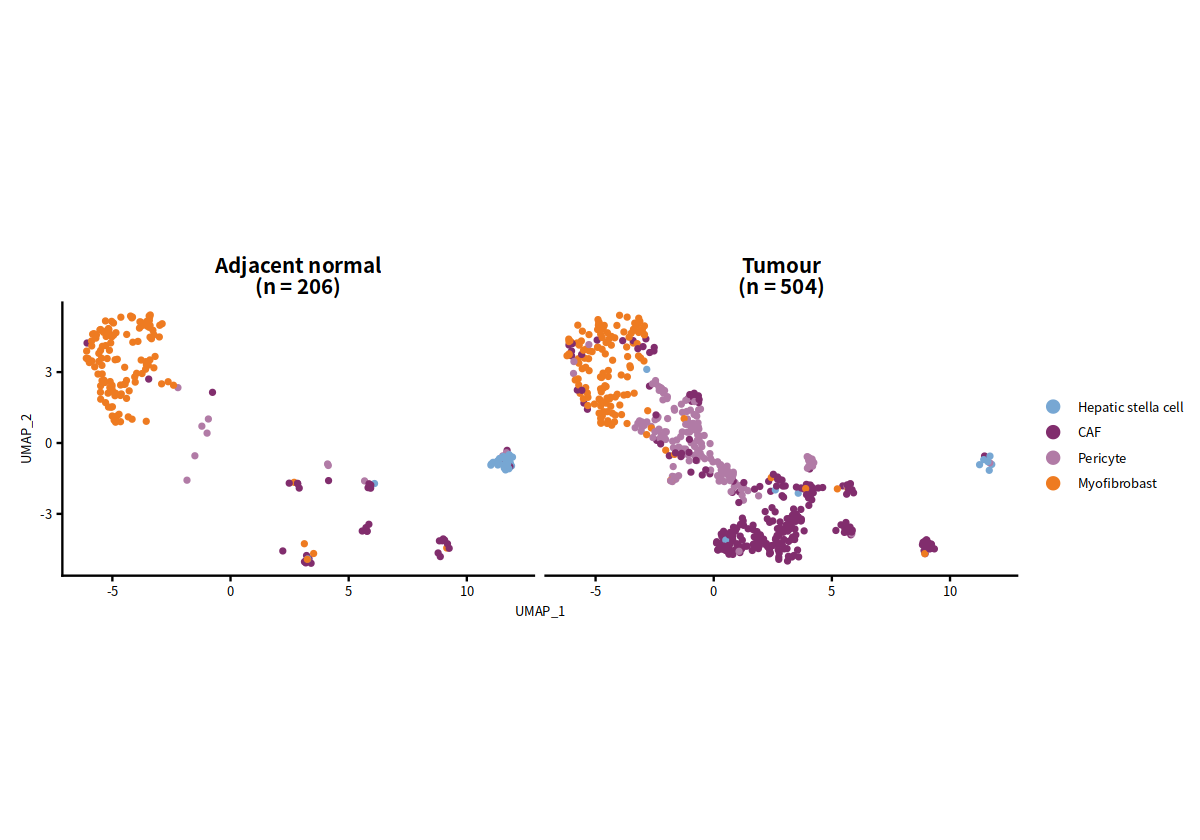

In [6]:
options(repr.plot.width=10, repr.plot.height=7)
pa <- DimPlot(seu_fib, reduction = "umap",
        group.by = "DefineTypes", split.by = "Tissues2") + scale_color_manual(values = c("#77a7d3","#812d6d","#b17ba6","#ee7b21","#f3ae63",
                                                                    "#e729bb","#dd854d","#00b4f0","#acd386","#539aa9","#87cabf","#a6767e")) +
    coord_fixed(ratio = 1) + 
    theme(panel.background = element_blank(),
          panel.grid.major=element_blank(),
          panel.grid.minor = element_blank(),
          plot.title = element_text(size = 9,
                                    hjust = 0.5),
          legend.text = element_text(size = 7.5),
          axis.title =  element_text(size = 7.5),
          axis.text = element_text(size = 7.5)) + 
    labs(title = "")
pa


## B

In [11]:
table(seu_fib$DefineTypes)


Hepatic stella cell                 CAF            Pericyte        Myofibrobast 
                 38                 290                 170                 266 

In [8]:
pal_c <- c("#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f")
prismatic::color(pal_c)

<colors>
#66C2A5FF #FC8D62FF #8DA0CBFF #E78AC3FF #A6D854FF #FFD92FFF 

In [13]:
seu_fib_df <- as.data.frame(prop.table(table(seu_fib$Tissues, seu_fib$DefineTypes, seu_fib$Sample), margin = 3))
colnames(seu_fib_df) <- c("Tissue", "DefineTypes", "Patients", "Freq")
seu_fib_df2 <- seu_fib_df[seu_fib_df$DefineTypes %in% "CAF",]

Warning message in wilcox.test.default(c(20.3703703703704, 11.4583333333333, 2.62626262626263, :
“cannot compute exact p-value with ties”


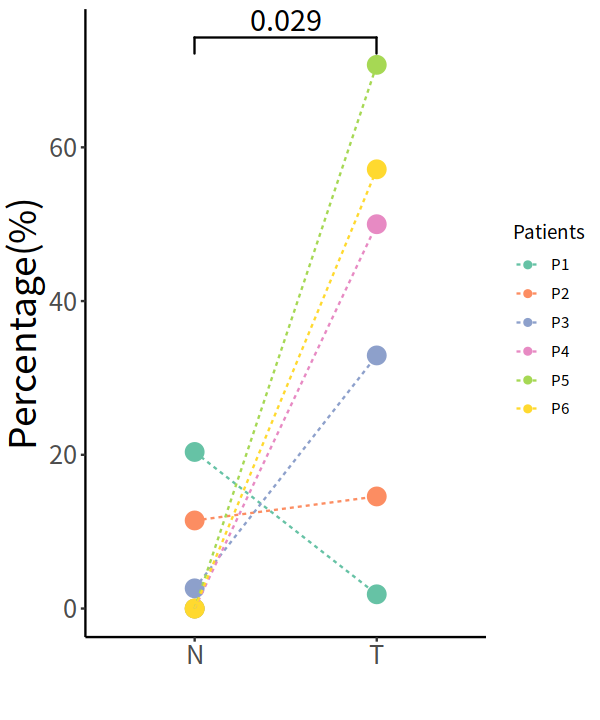

In [14]:
options(repr.plot.width=5, repr.plot.height=6)
pb <- ggplot(seu_fib_df2, aes(x = Tissue, y = Freq*100)) + 
geom_point(aes(color = Patients, size = 8)) + theme_classic() + 
guides(size = "none") + scale_color_manual(values = pal_c) + 
geom_line(aes(group = Patients, col = Patients), linetype=2) + 
geom_signif(comparisons = list(c("N", "T")),
              map_signif_level=F,
              textsize=6,test= "wilcox.test", step_increase=0.1) + 
              labs(x='',y = 'Percentage(%)') + 
              theme(
                axis.text = element_text(size = 15),
                axis.title = element_text(size=22)
              )
pb

# FigC

## Prepare

Load tcga dataset cibersortx output from Fig3.

In [2]:
load("Tmpout/tcga_tumor.Rda")
load("Tmpout/tcga_all.Rda")

In [4]:
ciber_tcga_df_raw <- fread("Input/Cibersortx/tcga.txt")
ciber_tcga_df <- merge(ciber_tcga_df_raw[,c("Mixture", "SPP1 Macrophage", "CAF")], tcga_clinical_all, by.x = "Mixture", by.y = "Sample")

In [5]:
head(ciber_tcga_df)

Mixture,SPP1 Macrophage,CAF,Type
<chr>,<dbl>,<dbl>,<chr>
TCGA-2V-A95S-01A,0.000000000,0.0082421528,T
TCGA-2Y-A9GS-01A,0.000000000,0.0226719455,T
TCGA-2Y-A9GT-01A,0.000000000,0.0052719909,T
TCGA-2Y-A9GU-01A,0.000000000,0.0001888949,T
TCGA-2Y-A9GV-01A,0.000000000,0.0019235502,T
TCGA-2Y-A9GW-01A,0.002064848,0.0268287040,T


## Plot

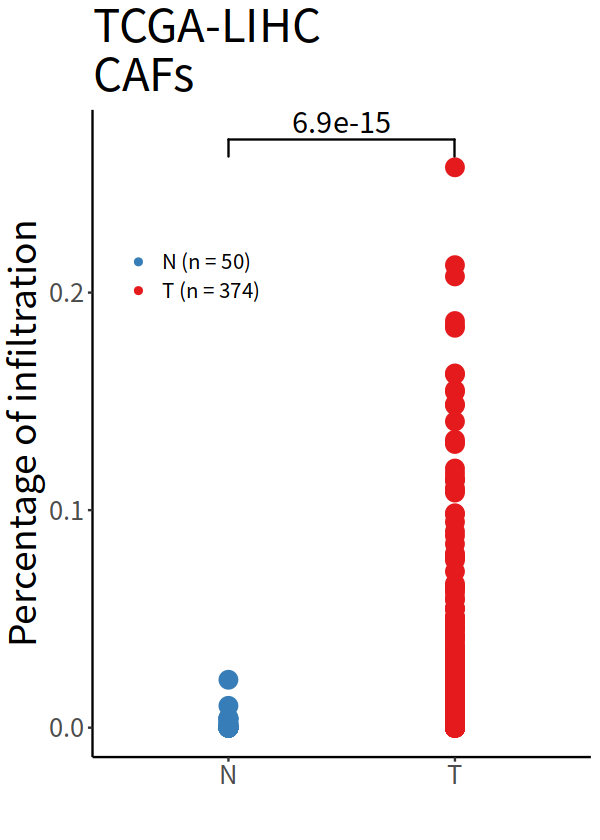

In [7]:
options(repr.plot.width=5, repr.plot.height=7)
pc <- ggplot(ciber_tcga_df, aes(x = Type, y = CAF)) + geom_point(aes(color = Type, size = 5)) + 
    theme_classic() + guides(size = "none") + 
    scale_color_manual(values = c("#377EB8", "#E41A1C"),
                       labels = c("N (n = 50)","T (n = 374)")) + 
    geom_signif(comparisons = list(c("N", "T")),
                map_signif_level=F,
                textsize=6,test= "wilcox.test", step_increase=0.1) + labs(x = "", y = "Percentage of infiltration") + theme(
                  legend.title = element_blank(),
                  legend.position = c(.2, .75),
                  legend.text = element_text(size = 12),
                  axis.text = element_text(size = 15),
                  axis.title = element_text(size = 22),
                  plot.title = element_text(size = 27)
                  ) + ggtitle("TCGA-LIHC \nCAFs")
pc

# FigD

## Prepare

Load icgc dataset cibersortx output from Fig3.

In [34]:
load("Tmpout/icgc_tumor.Rda")
load("Tmpout/icgc_all.Rda")

In [35]:
ciber_icgc_df_raw <- fread("Input/Cibersortx/icgc.txt")
ciber_icgc_df <- merge(ciber_icgc_df_raw[,c("Mixture", "SPP1 Macrophage", "CAF")], icgc_clinical_all, by.x = "Mixture", by.y = "Sample")

In [27]:
ciber_icgc_df_T <- ciber_icgc_df[ciber_icgc_df$Type %in% "T",]
ciber_icgc_df_T$Mixture <- gsub("_Cancer", "",
                                    ciber_icgc_df_T$Mixture)
ciber_icgc_df_T <- ciber_icgc_df_T[match(icgc_clinical$icgc_donor_id,ciber_icgc_df_T$Mixture),]

In [11]:
icgc_clinical$OS.time <- icgc_clinical$OS.time/30
fivenum(icgc_clinical$OS.time)

[1]  0.3333333 17.0000000 26.0000000 36.5000000 72.0000000

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


$CAF


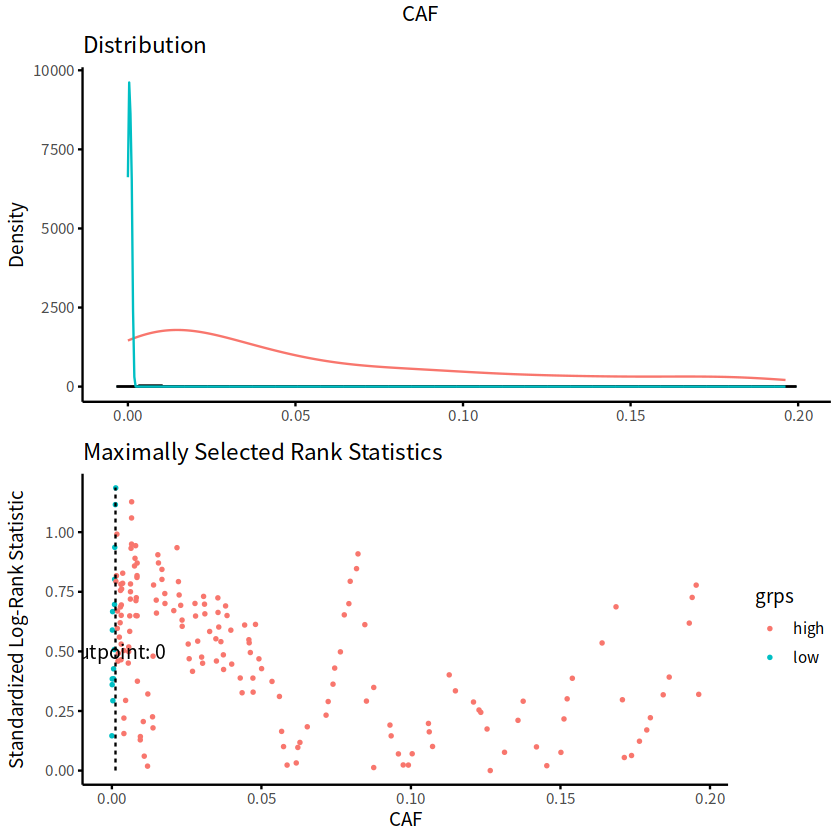

In [12]:
icgc_clinical$CAF <- ciber_icgc_df_T$CAF


res.cut <- surv_cutpoint(icgc_clinical, time = "OS.time", event = "OS",
                         variables = "CAF")
plot(res.cut, "CAF")

## Exp plot

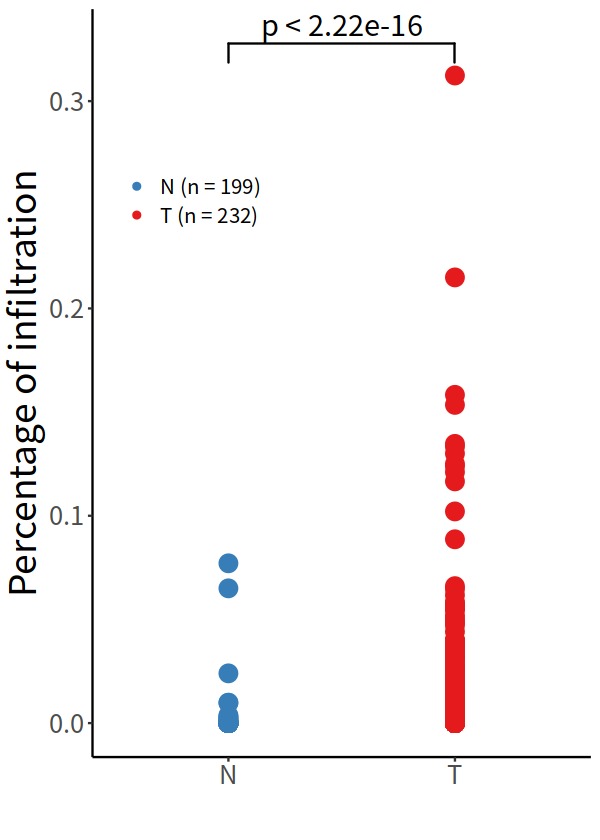

In [31]:
options(repr.plot.width=5, repr.plot.height=7)
ggplot(ciber_icgc_df, aes(x = Type, y = `SPP1 Macrophage`)) + geom_point(aes(color = Type, size = 5)) + 
    theme_classic() + guides(size = "none") + 
    scale_color_manual(values = c("#377EB8", "#E41A1C"),
                       labels = c("N (n = 199)","T (n = 232)")) + 
    geom_signif(comparisons = list(c("N", "T")),
                map_signif_level=F,
                textsize=6,test= "wilcox.test", step_increase=0.1) + labs(x = "", y = "Percentage of infiltration") + theme(
                  legend.title = element_blank(),
                  legend.position = c(.2, .75),
                  legend.text = element_text(size = 12),
                  axis.text = element_text(size = 15),
                  axis.title = element_text(size = 22)
                  )

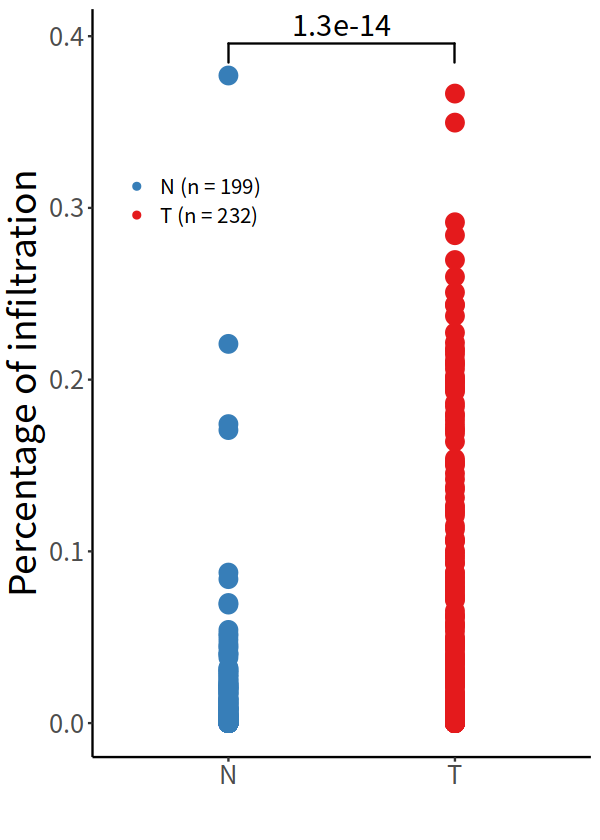

In [32]:
options(repr.plot.width=5, repr.plot.height=7)
ggplot(ciber_icgc_df, aes(x = Type, y = CAF)) + geom_point(aes(color = Type, size = 5)) + 
    theme_classic() + guides(size = "none") + 
    scale_color_manual(values = c("#377EB8", "#E41A1C"),
                       labels = c("N (n = 199)","T (n = 232)")) + 
    geom_signif(comparisons = list(c("N", "T")),
                map_signif_level=F,
                textsize=6,test= "wilcox.test", step_increase=0.1) + labs(x = "", y = "Percentage of infiltration") + theme(
                  legend.title = element_blank(),
                  legend.position = c(.2, .75),
                  legend.text = element_text(size = 12),
                  axis.text = element_text(size = 15),
                  axis.title = element_text(size = 22)
                  )

## Plot

In [13]:
icgc_clinical$CAF_group <- ifelse(
  icgc_clinical$CAF > res.cut$cutpoint$cutpoint, "high", "low"
)

In [16]:
table(icgc_clinical$CAF_group)


high  low 
 192   40 

In [14]:
sfit <- survfit(Surv(OS.time, OS)~CAF_group, data=icgc_clinical)
p <- ggsurvplot(sfit, conf.int=F, pval=TRUE, 
                     risk.table = T,
                pval.size = 6,
          palette = c('#FF2800', "#0000FF"),
           ggtheme = theme_classic(),
          legend.labs = c("high risk (n = 40)","low risk (n = 192)"))

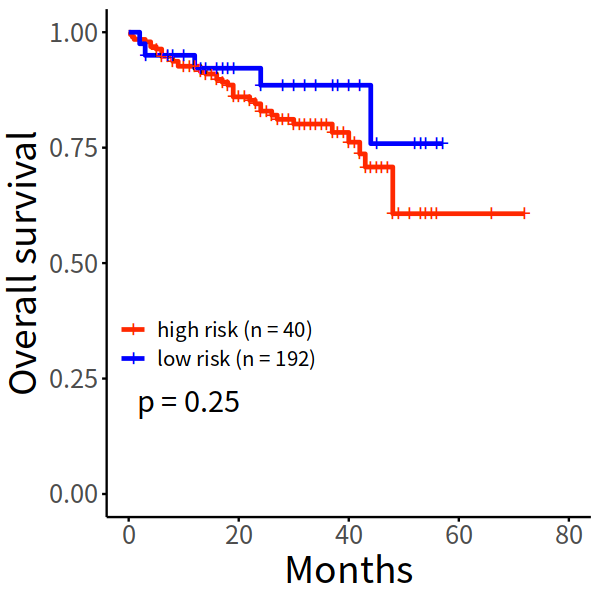

In [19]:
options(repr.plot.width=5, repr.plot.height=5)
pd <- p$plot + labs(x = "Months", y = "Overall survival") + theme(
  axis.text = element_text(size = 15),
  axis.title = element_text(size = 22),
  legend.position = c(.23, .35),
  legend.text = element_text(size = 12),
  legend.title = element_blank(),
  legend.background = element_rect(fill = "transparent")
)
pd

# FigE,F,G,H

In [18]:
table(seu$DefineTypes)


               Bio potent                       CAF                 Capillary 
                      234                       290                       812 
           Capillary Vein         CCL3L1 Macrophage                   CD16 NK 
                       51                      1002                      4576 
                 CD160 NK                 CD8+ MAIT                  CD8+ Trm 
                    10858                      6123                      2562 
               CD99 BCell    Chemotactic Macrophage        Classical Monocyte 
                      391                       300                      2175 
        Cytotoxicity CD8T                       DC1                       DC2 
                     2593                       254                       774 
              DUSP2 BCell            Exhausted CD8T          Follicular BCell 
                      638                     10757                       879 
         FOLR2 Macrophage                GAS5 BCell

In [11]:
spa_p1T$DefineTypes2 <- factor(spa_p1T$DefineTypes,
                                levels = c("SPP1_Macrophage/CAF", "Immune_Fibroblast", "Myofibroblast_Pericyte", "hepatocyte", "malignant hepatocyte", "HMGB2 malignant hepatocyte", "MAP3K12 malignant hepatocyte"))

## Markers

In [20]:
# SPP1 markers
SPP1_markers <- FindMarkers(seu, ident.1 = "SPP1 Macrophage", only.pos = T)

# CAF markers
CAF_markers <- FindMarkers(seu, ident.1 = "CAF", only.pos = T)

In [ ]:
SPP1_markers_20 <- SPP1_markers[order(SPP1_markers$avg_log2FC, decreasing = T),] %>% rownames() %>% head(20)
CAF_markers_20 <- CAF_markers[order(CAF_markers$avg_log2FC, decreasing = T),] %>% rownames() %>% head(20)

In [ ]:
# Cal score:
add_score_list <- list(
  SPP1 = SPP1_markers_20,
  CAF = CAF_markers_20
)

spa_p1T <- AddModuleScore(
  object = spa_p1T,
  features = add_score_list,
  ctrl = 5
)

## E

In [8]:
pal_e <- c("#45135D", "#3E5489", "#3BAF7D", "#C7DE3E")
prismatic::color(pal_e)

<colors>
#45135DFF #3E5489FF #3BAF7DFF #C7DE3EFF 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


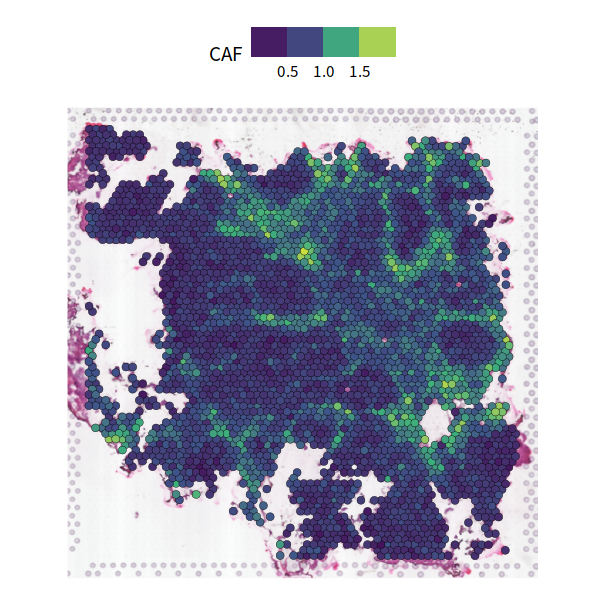

In [20]:
options(repr.plot.width=5, repr.plot.height=5)
pe <- SpatialFeaturePlot(spa_p1T, images = "image_P11_T", features = "CAF") + 
theme(legend.position = "top") + 
scale_fill_gradientn(
  colours = pal_e,
  breaks = c(0.5, 1.0, 1.5),
  guide = guide_coloursteps(even.steps = T)
)
pe

## F

In [12]:
pal_f <- c("#F00034", "#5800C0", "#FFBC00",
         "#80F041", "#008281", "#139AB6", "#23504F")
prismatic::color(pal_f)

<colors>
#F00034FF #5800C0FF #FFBC00FF #80F041FF #008281FF #139AB6FF #23504FFF 

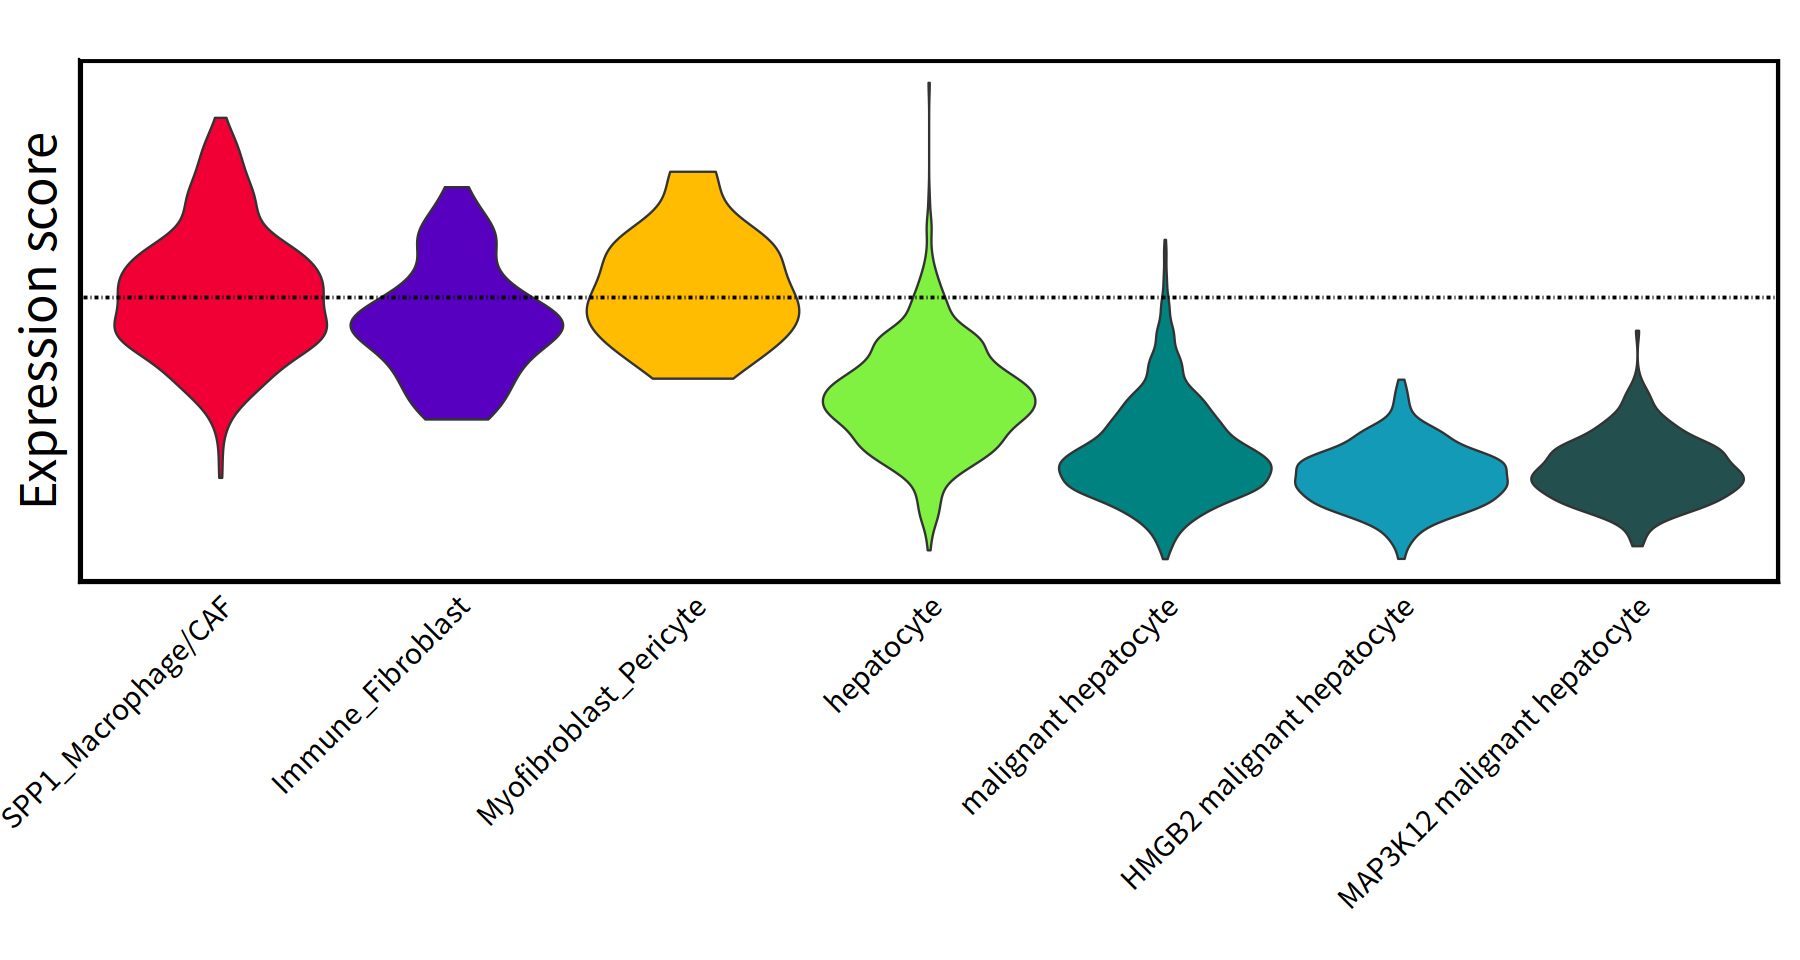

In [19]:
options(repr.plot.width=15, repr.plot.height=8)
pf <- VlnPlot(spa_p1T, features = "CAF", pt.size = 0, group.by = "DefineTypes2") + theme(legend.position = "None") + geom_hline(yintercept = median(spa_p1T@meta.data$CAF[spa_p1T@meta.data$DefineTypes2 %in% "SPP1_Macrophage/CAF"]), lty=4,col="black",lwd=0.8) + 
  scale_fill_manual(values = pal_f) + labs(y = "Expression score",
                                         x = "") + ggtitle("") + theme(
                                          axis.text.y = element_blank(),
                                          axis.ticks.y = element_blank(),
                                          axis.text.x = element_text(size = 17),
                                          axis.ticks = element_blank(),
                                          axis.title.y = element_text(size = 29),
                                          panel.border = element_rect(color = "black", linewidth = 1.5, fill = NA)
                                         )
pf                                    

## G

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


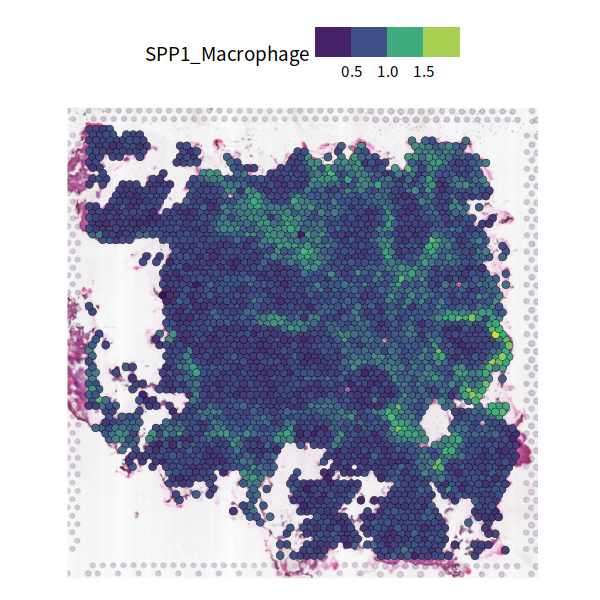

In [21]:
options(repr.plot.width=5, repr.plot.height=5)
pg <- SpatialFeaturePlot(spa_p1T, images = "image_P11_T", features = "SPP1_Macrophage") + 
theme(legend.position = "top") + 
scale_fill_gradientn(
  colours = pal_e,
  breaks = c(0.5, 1.0, 1.5),
  guide = guide_coloursteps(even.steps = T)
)
pg

## H

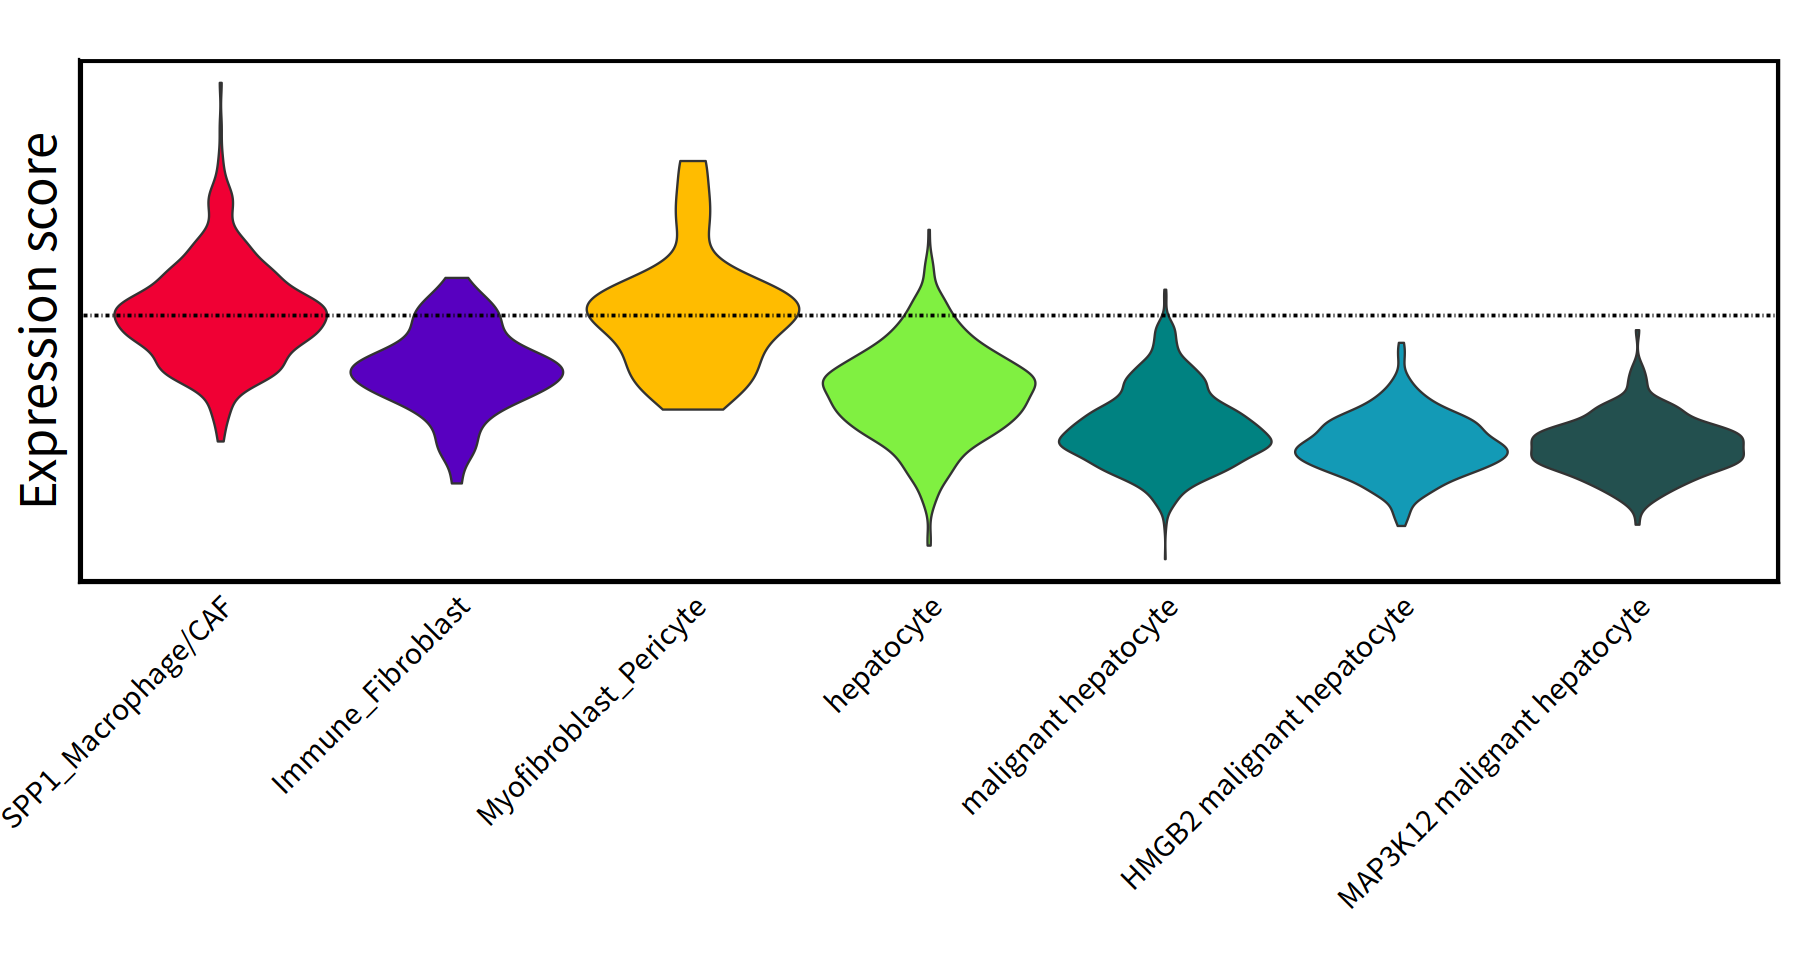

In [24]:
options(repr.plot.width=15, repr.plot.height=8)
ph <- VlnPlot(spa_p1T, features = "SPP1_Macrophage", pt.size = 0, group.by = "DefineTypes2") + theme(legend.position = "None") + geom_hline(yintercept = median(spa_p1T@meta.data$SPP1_Macrophage[spa_p1T@meta.data$DefineTypes2 %in% "SPP1_Macrophage/CAF"]), lty=4,col="black",lwd=0.8) + 
  scale_fill_manual(values = pal_f) + labs(y = "Expression score",
                                         x = "") + ggtitle("") + theme(
                                          axis.text.y = element_blank(),
                                          axis.ticks.y = element_blank(),
                                          axis.text.x = element_text(size = 17),
                                          axis.ticks = element_blank(),
                                          axis.title.y = element_text(size = 29),
                                          panel.border = element_rect(color = "black", linewidth = 1.5, fill = NA)
                                         )
ph                                    

# FigI

# FigO,P,Q

## Nichenet

Method described:
- For ligand and receptor interactions, clustered cells with gene expression over 10% were considered. 
- The top 100 ligands and top 1,000 targets of differentially expressed genes of “sender cells” and “affected cells” were extracted for paired ligand-receptor activity analysis. - When evaluating the regulatory network of SPP1+ macrophages on CAFs, CAFs was considered as reference receiver cells and other subtypes of fibroblasts were used as reference cells to check the regulatory potential of SPP1+ macrophages on CAFs. 
- The ligand_activity_target_heatmap in Nichenet_output was used to show the regulatory activity of ligands. Activity scores ranged from 0 to 1.

- reference receiver cells: CAFs
- other subtypes of fibroblasts were used as reference cells
- SPP1 macro is sender cell

Download human:
- lr_network : https://zenodo.org/record/7074291/files/lr_network_human_21122021.rds
- ligand_target_matrix : https://zenodo.org/record/7074291/files/ligand_target_matrix_nsga2r_final.rds
- weighted_networks : https://zenodo.org/record/7074291/files/weighted_networks_nsga2r_final.rds

Ref:
- [nichenetr/vignettes/seurat_wrapper.md at master · saeyslab/nichenetr](https://github.com/saeyslab/nichenetr/blob/master/vignettes/seurat_wrapper.md)
- [nichenetr/vignettes/seurat_steps.md at master · saeyslab/nichenetr](https://github.com/saeyslab/nichenetr/blob/master/vignettes/seurat_steps.md)
- [nichenetr/vignettes/ligand_activity_geneset.md at master · saeyslab/nichenetr](https://github.com/saeyslab/nichenetr/blob/master/vignettes/ligand_activity_geneset.md)

### Calculate ligand target activity

Load file

In [16]:
ligand_target_matrix <- readRDS("Input/Nichenet/ligand_target_matrix_nsga2r_final.rds")
ligand_target_matrix[1:5,1:5] # target genes in rows, ligands in columns

lr_network <- readRDS("Input/Nichenet/lr_network_human_21122021.rds")
head(lr_network)

weighted_networks = readRDS("Input/Nichenet/weighted_networks_nsga2r_final.rds")
head(weighted_networks$lr_sig) # interactions and their weights in the ligand-receptor + signaling network
head(weighted_networks$gr) # interactions and their weights in the gene regulatory network
weighted_networks_lr <- weighted_networks$lr_sig %>% inner_join(lr_network %>% distinct(from,to), by = c("from","to"))

,A2M,AANAT,ABCA1,ACE,ACE2
A-GAMMA3'E,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000
A1BG,0.0018503922,0.0011108718,0.0014225077,0.0028594037,0.001139013
A1BG-AS1,0.0007400797,0.0004677614,0.0005193137,0.0007836698,0.000375007
A1CF,0.0024799266,0.0013026348,0.0020420890,0.0047921048,0.003273375
A2M,0.0084693452,0.0040689323,0.0064256379,0.0105191365,0.005719199


from,to,database,source
<chr>,<chr>,<chr>,<chr>
A2M,MMP2,omnipath,omnipath
A2M,MMP9,omnipath,omnipath
A2M,LRP1,omnipath,omnipath
A2M,KLK3,omnipath,omnipath
AANAT,MTNR1A,nichenet_verschueren,nichenet_verschueren
AANAT,MTNR1B,nichenet_verschueren,nichenet_verschueren


from,to,weight
<chr>,<chr>,<dbl>
A-GAMMA3'E,ACTG1P11,0.10018411
A-GAMMA3'E,AXIN2,0.08687722
A-GAMMA3'E,BUB1B-PAK6,0.09322200
A-GAMMA3'E,CEACAM7,0.07927829
A-GAMMA3'E,CHRNA1,0.09010287
A-GAMMA3'E,DTX2P1,0.09758541


from,to,weight
<chr>,<chr>,<dbl>
A1BG,A2M,0.16500026
AAAS,GFAP,0.09064868
AADAC,CTAG1B,0.10358772
AADAC,CYP3A4,0.17727654
AADAC,DIRAS3,0.09359021
AADAC,IRF8,0.08918009


Prepare input

In [11]:
Idents(seu) <- "DefineTypes"

In [12]:
seu_markers <- FindAllMarkers(seu, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.25)
# save(seu_markers, file = "seu_markers.Rda")

Calculating cluster Hepatic stella cell



Calculating cluster CAF

Calculating cluster Pericyte

Calculating cluster Myofibrobast

Calculating cluster PLVAP Endo

Calculating cluster Capillary

Calculating cluster RPhi Endo

Calculating cluster Large Artery

Calculating cluster Vein/Capillary Vein

Calculating cluster Proliferating Endo

Calculating cluster TFF3 Endo

Calculating cluster Capillary Vein

Calculating cluster INTS6 Endo

Calculating cluster FOLR2 Macrophage

Calculating cluster Proliferating Macrophage

Calculating cluster DC1

Calculating cluster Pro-inflammatory Monocyte

Calculating cluster Classical Monocyte

Calculating cluster CCL3L1 Macrophage

Calculating cluster SPP1 Macrophage

Calculating cluster Chemotactic Macrophage

Calculating cluster Plasmacytoid DC

Calculating cluster DC2

Calculating cluster Neutrophil

Calculating cluster Mast cell

Calculating cluster Regulatory CD4T

Calculating cluster CD160 NK

Calculating cluster Cytotoxicity CD8T

Calculating cluster Exhausted CD8T

Calculating cluster 

In [17]:
receivers <- c(# "Hepatic stella cell",
               "CAF")
               # "Pericyte",
               # "Myofibrobast")
# senders <- unique(seu_mye$DefineTypes)
senders <- "SPP1 Macrophage"

Three input:
- geneset_oi, geneset of interest for ligand activity analysis(genes may potentially influced by ligands, markers of CAFs compared with other fibro cells)
- potential_ligands, expressed by sender cells
- the background, non-affected, genes (can contain the symbols of the affected genes as well).

In [18]:
Idents(seu_fib) <- "DefineTypes"
CAF_markers <- FindMarkers(seu_fib, ident.1 = "CAF", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.25)

In [20]:
# potential legands ----
seu_markers_receiver <- seu_markers[seu_markers$cluster %in% receivers,]
# seu_markers_receiver <- seu_markers_receiver[seu_markers_receiver$avg_log2FC > 0.25 & seu_markers_receiver$p_val_adj < 0.05,]
expressed_genes_receiver <- unique(seu_markers_receiver[order(seu_markers_receiver$avg_log2FC, decreasing = T),]$gene)

seu_markers_sender <- seu_markers[seu_markers$cluster %in% senders,]
# seu_markers_sender <- seu_markers_sender[seu_markers_sender$avg_log2FC > 0.25 & seu_markers_sender$p_val_adj < 0.05,]
expressed_genes_sender <- unique(seu_markers_sender[order(seu_markers_sender$avg_log2FC, decreasing = T),]$gene)

ligands = lr_network %>% pull(from) %>% unique()
receptors = lr_network %>% pull(to) %>% unique()

expressed_ligands = intersect(ligands,expressed_genes_sender)
expressed_receptors = intersect(receptors,expressed_genes_receiver)

potential_ligands <- lr_network %>% filter(from %in% expressed_ligands & to %in% expressed_receptors) %>% pull(from) %>% unique()

# Backgroud ----
background_expressed_genes <- rownames(seu_fib)

In [22]:
length(potential_ligands)
# only 43 ligands can be used in this case instead of top 100.

[1] 43

In [23]:
# geneset oi
geneset_oi <- CAF_markers[order(CAF_markers$avg_log2FC, decreasing = T),] %>% rownames() %>% unique()
geneset_oi <- geneset_oi %>% .[. %in% rownames(ligand_target_matrix)]
geneset_oi2 <- head(geneset_oi, 1000)

In [31]:
save(geneset_oi2, ligand_activities, 
    potential_ligands, file = "tmp.Rda")

In [28]:
ligand_activities <- predict_ligand_activities(geneset = geneset_oi2, 
                                              background_expressed_genes = background_expressed_genes, ligand_target_matrix = ligand_target_matrix, 
                                              potential_ligands = potential_ligands)

### Plot Nichenet results

In [32]:
ligand_activities <- ligand_activities %>% dplyr::arrange(-pearson) %>% dplyr::mutate(rank = rank(dplyr::desc(pearson)))
ligand_activities

test_ligand,auroc,aupr,aupr_corrected,pearson,rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MMP14,0.7738551,0.10568198,0.07847662,0.17612909,1
CTSD,0.7692360,0.09766416,0.07045880,0.17503996,2
TIMP2,0.7604484,0.10085769,0.07365233,0.17275706,3
FCN1,0.7711027,0.09727344,0.07006808,0.16965181,4
VCAN,0.7747075,0.09825409,0.07104873,0.16874608,5
A2M,0.7667941,0.09839322,0.07118786,0.16851490,6
TIMP1,0.7591016,0.09931744,0.07211208,0.16817606,7
ENG,0.7700353,0.09725888,0.07005352,0.16771745,8
C1QB,0.7667861,0.09630707,0.06910171,0.16605315,9


Ligand activity

In [34]:
ligand_aupr_matrix = ligand_activities %>% dplyr::select(pearson) %>% as.matrix() %>% magrittr::set_rownames(ligand_activities$test_ligand)
rownames(ligand_aupr_matrix) = rownames(ligand_aupr_matrix) %>% make.names()
colnames(ligand_aupr_matrix) = colnames(ligand_aupr_matrix) %>% make.names()
upstream_ligands <- ligand_activities %>% dplyr::arrange(-pearson) %>% pull(test_ligand) %>% unique()
# upstream_ligands
# order_ligands = intersect(upstream_ligands, colnames(active_ligand_target_links)) %>% rev() %>% make.names()
vis_ligand_aupr = data.frame(
  R = rev(ligand_aupr_matrix[,1])
) %>% as.matrix()

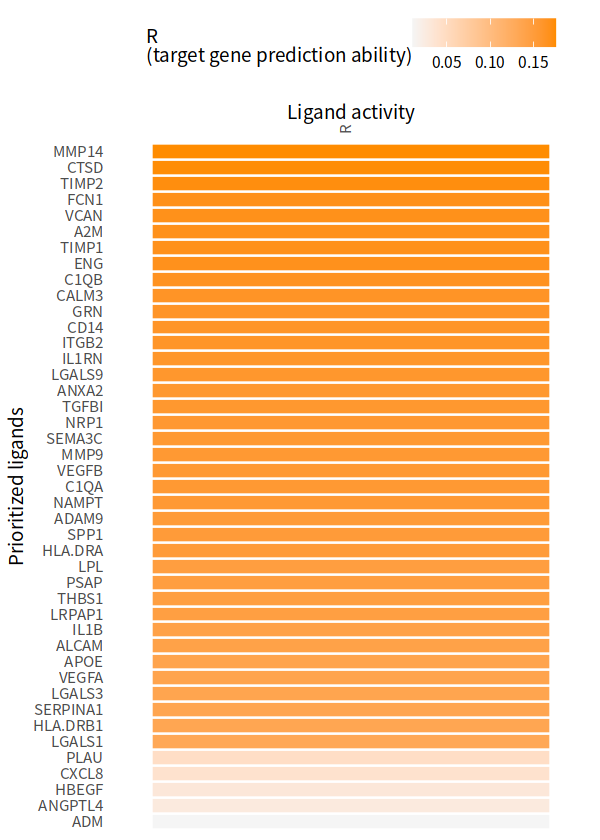

In [35]:
p_ligand = vis_ligand_aupr %>% make_heatmap_ggplot("Prioritized ligands","Ligand activity", color = "darkorange",legend_position = "top", x_axis_position = "top", legend_title = "R\n(target gene prediction ability)") + theme(legend.text = element_text(size = 9))
p_ligand

Infer receptor

In [37]:
lr_network_top = lr_network %>% filter(from %in% upstream_ligands & to %in% expressed_receptors) %>% distinct(from,to)
upstream_receptors = lr_network_top %>% pull(to) %>% unique()

lr_network_top_df_large = weighted_networks_lr %>% filter(from %in% upstream_ligands & to %in% upstream_receptors)

lr_network_top_df = lr_network_top_df_large %>% spread("from","weight",fill = 0)
lr_network_top_matrix = lr_network_top_df %>% dplyr::select(-to) %>% as.matrix() %>% magrittr::set_rownames(lr_network_top_df$to)

dist_receptors = dist(lr_network_top_matrix, method = "binary")
hclust_receptors = hclust(dist_receptors, method = "ward.D2")
order_receptors = hclust_receptors$labels[hclust_receptors$order]
    
dist_ligands = dist(lr_network_top_matrix %>% t(), method = "binary")
hclust_ligands = hclust(dist_ligands, method = "ward.D2")
order_ligands_receptor = hclust_ligands$labels[hclust_ligands$order]

order_receptors = order_receptors %>% intersect(rownames(lr_network_top_matrix))
order_ligands_receptor = order_ligands_receptor %>% intersect(colnames(lr_network_top_matrix))

vis_ligand_receptor_network = lr_network_top_matrix[order_receptors, order_ligands_receptor]
rownames(vis_ligand_receptor_network) = order_receptors %>% make.names()
colnames(vis_ligand_receptor_network) = order_ligands_receptor %>% make.names()
vis_ligand_receptor_network <- vis_ligand_receptor_network[,match(rownames(vis_ligand_aupr), colnames(vis_ligand_receptor_network))]
vis_ligand_receptor_network <- t(vis_ligand_receptor_network)

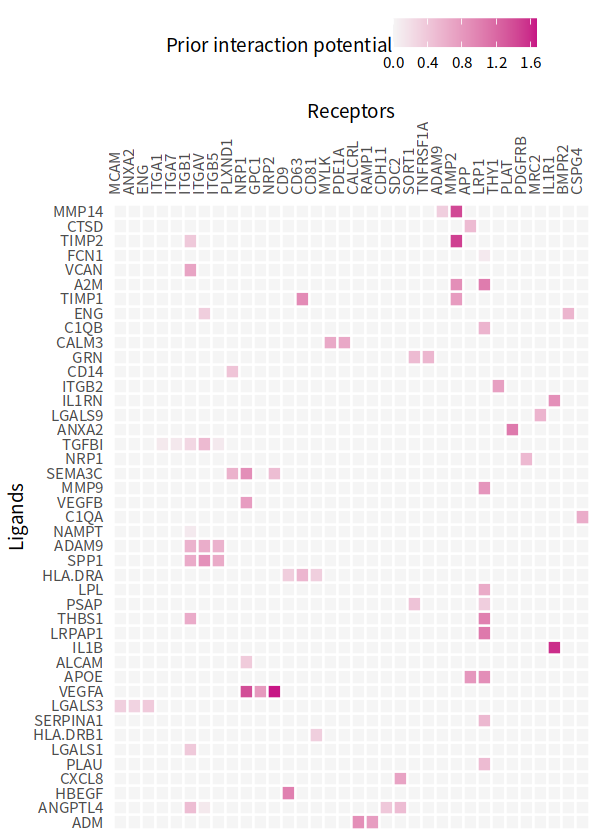

In [38]:
p_ligand_receptor_network <- vis_ligand_receptor_network %>% make_heatmap_ggplot("Ligands","Receptors", color = "mediumvioletred", x_axis_position = "top",legend_title = "Prior interaction potential")
p_ligand_receptor_network 

Infer target(TF target)

In [40]:
active_ligand_target_links_df <- upstream_ligands %>% lapply(get_weighted_ligand_target_links, geneset = geneset_oi, ligand_target_matrix = ligand_target_matrix, n = 200) %>% 
    bind_rows() %>% drop_na()

In [41]:
active_ligand_target_links = prepare_ligand_target_visualization(ligand_target_df = active_ligand_target_links_df, ligand_target_matrix = ligand_target_matrix, cutoff = 0)

order_ligands = intersect(upstream_ligands, colnames(active_ligand_target_links)) %>% rev() %>% make.names()
order_targets = active_ligand_target_links_df$target %>% unique() %>% intersect(rownames(active_ligand_target_links)) %>% make.names()
rownames(active_ligand_target_links) = rownames(active_ligand_target_links) %>% make.names() # make.names() for heatmap visualization of genes like H2-T23
colnames(active_ligand_target_links) = colnames(active_ligand_target_links) %>% make.names() # make.names() for heatmap visualization of genes like H2-T23

vis_ligand_target = active_ligand_target_links[order_targets,order_ligands] %>% t()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


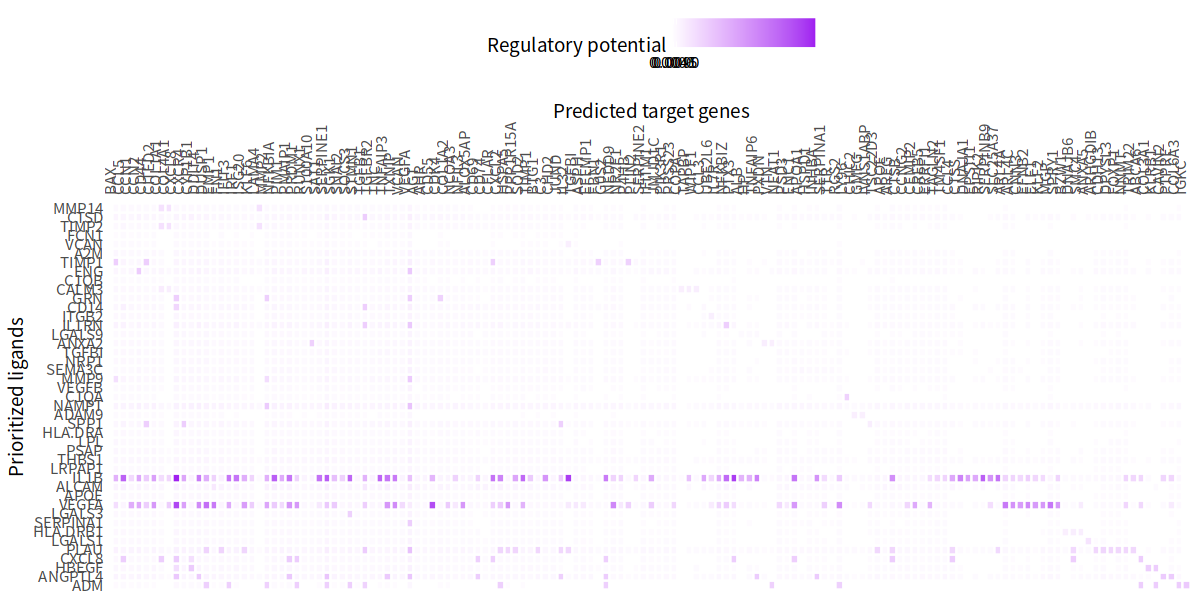

In [43]:
options(repr.plot.width=10, repr.plot.height=5)
p_ligand_target_network <- vis_ligand_target %>% make_heatmap_ggplot("Prioritized ligands","Predicted target genes", color = "purple",legend_position = "top", x_axis_position = "top",legend_title = "Regulatory potential")  + theme(axis.text.x = element_text(face = "italic")) + scale_fill_gradient2(low = "whitesmoke",  high = "purple", breaks = c(0,0.0045,0.0090))
p_ligand_target_network 

Combine the results

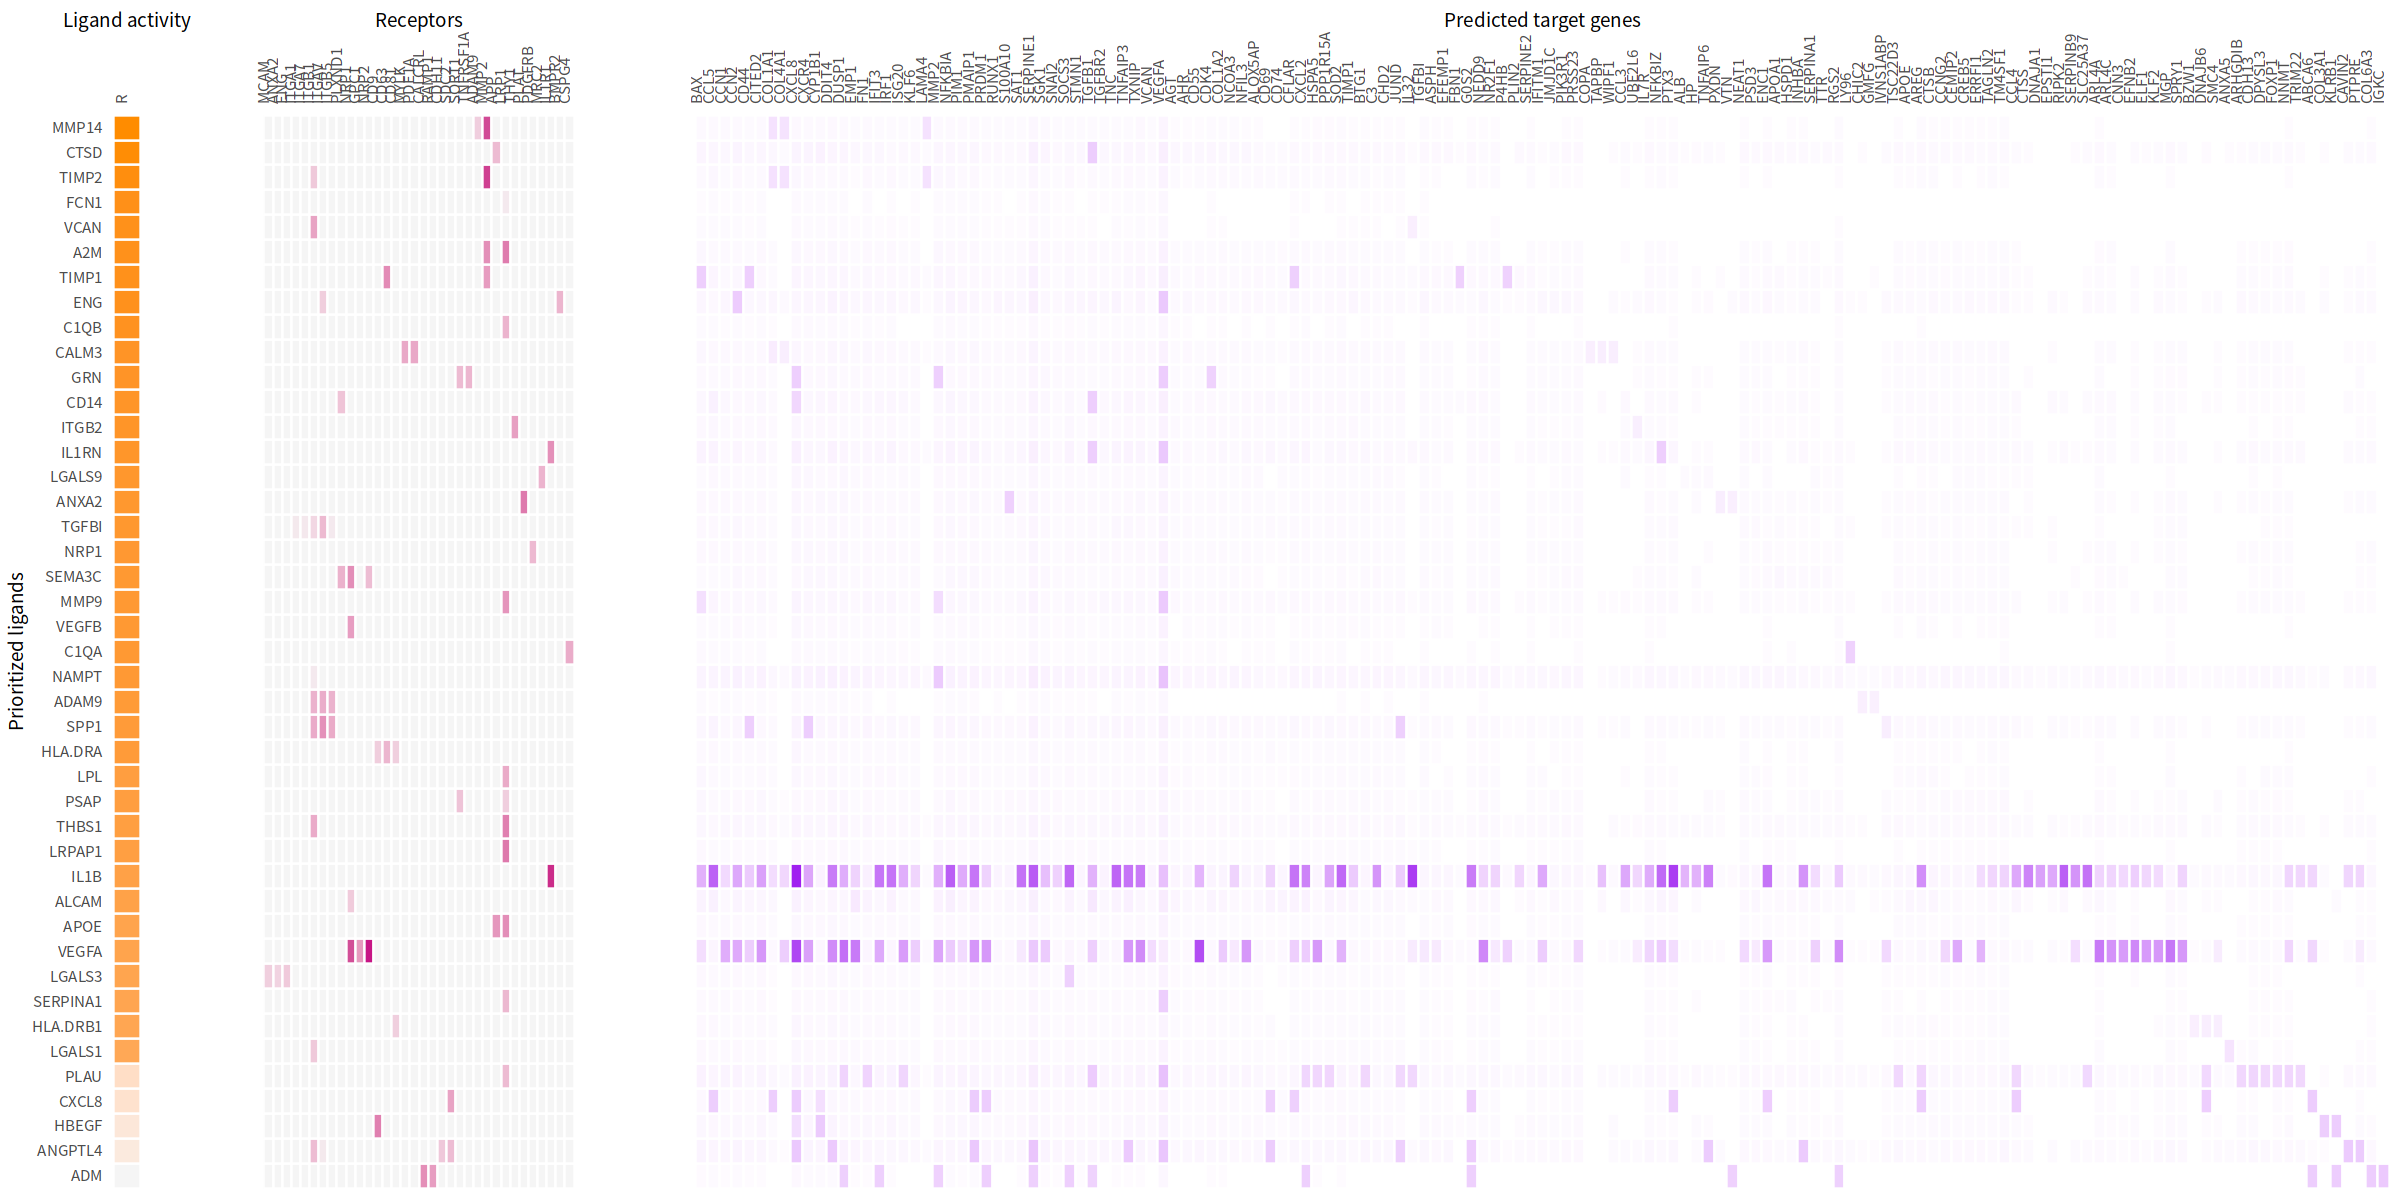

In [51]:
options(repr.plot.width=20, repr.plot.height=10)
cowplot::plot_grid(
  p_ligand + theme(legend.position = "none", axis.ticks = element_blank()) + theme(axis.title.x = element_text()),
  p_ligand_receptor_network + theme(legend.position = "none", axis.ticks = element_blank(), axis.text.y = element_blank()) + ylab(""),
  p_ligand_target_network + theme(legend.position = "none", axis.ticks = element_blank(), axis.text.y = element_blank()) + ylab(""),
  align = "hv",
  nrow = 1,
  rel_widths = c(ncol(vis_ligand_aupr)+11, ncol(vis_ligand_receptor_network), ncol(vis_ligand_target))
  )

## P

ligands, transcription factor targets, and targets are interconnected in cell communication. Ligands bind to receptors, leading to the activation or modulation of transcription factors, which, in turn, regulate the expression of their target genes.

What is the relationship between receptors and targets(genes of interests)?
Because, the Nichenet only provides the ligand-receptor and ligand-target pairs, ligand-target pair is selected for network visualization.

In [52]:
head(lr_network_top_df_large)

from,to,weight
<chr>,<chr>,<dbl>
A2M,LRP1,1.0437176
A2M,MMP2,0.8858802
ADAM9,ITGAV,0.6256288
ADAM9,ITGB1,0.5820835
ADAM9,ITGB5,0.5855725
ADM,CALCRL,0.8825216


In [55]:
sel_ligand <- c("SPP1", "IL1B", "TGFBI")
ligand_target_sel <- active_ligand_target_links_df[active_ligand_target_links_df$ligand %in% sel_ligand,]
ligand_target_sel_list <- split(ligand_target_sel,
                                ligand_target_sel$ligand)
ligand_target_sel_list$IL1B <- ligand_target_sel_list$IL1B$target
ligand_target_sel_list$SPP1 <- ligand_target_sel_list$SPP1$target
ligand_target_sel_list$TGFBI <- ligand_target_sel_list$TGFBI$target

In [58]:
cnetplot(ligand_target_sel_list) + 
    # ggplot2::scale_color_gradient2(name="Spearman's coefficient",
    #                                low='blue', high='firebrick') + 
  guides(size = "none")

ERROR while rich displaying an object: Error in UseMethod("rescale"): "rescale"没有适用于"AsIs"目标对象的方法

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(

![](http://cos01.mugpeng.top/img/20231220143416.png)

## O

### Prepare

In [64]:
add_score_list <- list(
  ligands = unique(active_ligand_target_links_df$ligand),
  targets = unique(active_ligand_target_links_df$target)
)
spa_p1T <- AddModuleScore(
  object = spa_p1T,
  features = add_score_list,
  ctrl = 5,
  names = c("ligands", "targets")
)
colnames(spa_p1T@meta.data)[10:11] <- names(add_score_list)
colnames(spa_p1T@meta.data)

[1] "orig.ident"       "nCount_Spatial"   "nFeature_Spatial" "Tissues"         
 [5] "Pat_Tissues"      "Mito.percent"     "DefineTypes"      "SPP1_Macrophage" 
 [9] "CAF"              "ligands"          "targets"

### Plot

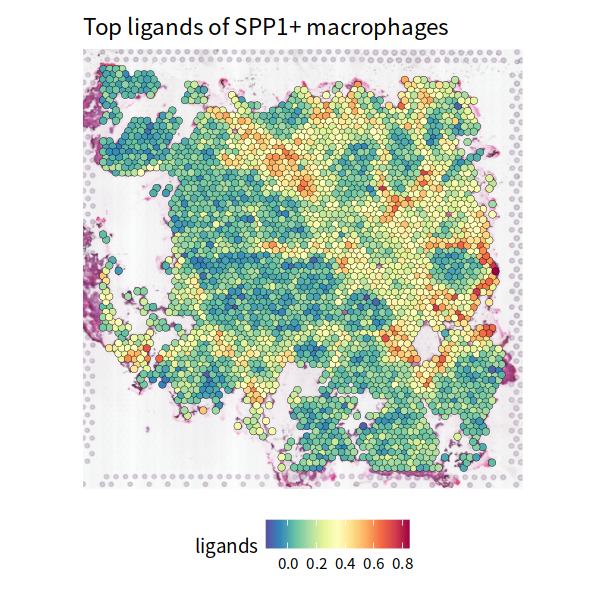

In [66]:
options(repr.plot.width=5, repr.plot.height=5)
pp_1 <- SpatialFeaturePlot(spa_p1T, images = "image_P11_T", features = "ligands") + 
theme(legend.position = "bottom") + 
ggtitle("Top ligands of SPP1+ macrophages")
# scale_fill_gradientn(
#   colours = pal_e,
#   breaks = c(0.5, 1.0, 1.5),
#   guide = guide_coloursteps(even.steps = T)
# )
pp_1

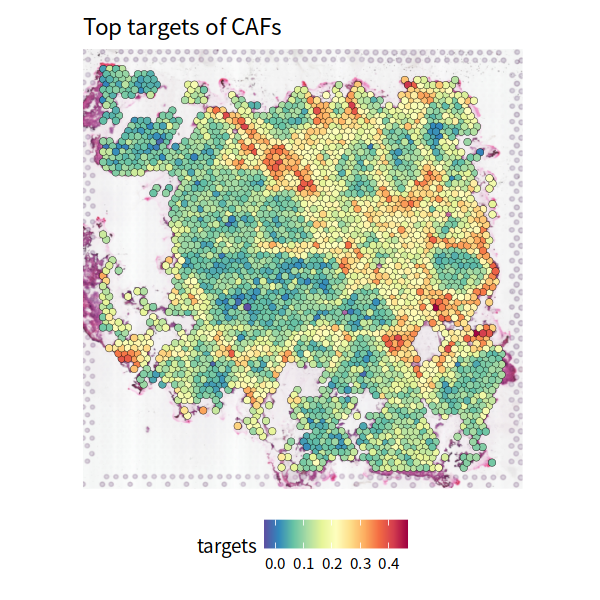

In [67]:
options(repr.plot.width=5, repr.plot.height=5)
pp_2 <- SpatialFeaturePlot(spa_p1T, images = "image_P11_T", features = "targets") + 
theme(legend.position = "bottom") + 
ggtitle("Top targets of CAFs")
# scale_fill_gradientn(
#   colours = pal_e,
#   breaks = c(0.5, 1.0, 1.5),
#   guide = guide_coloursteps(even.steps = T)
# )
pp_2

## Q

### Prepare

In [73]:
active_ligand_target_links_df2 <- active_ligand_target_links_df[order(active_ligand_target_links_df$weight, decreasing = T),]

In [75]:
top20_ligand

[1] "MMP14"  "CTSD"   "TIMP2"  "FCN1"   "VCAN"   "A2M"    "TIMP1"  "ENG"   
 [9] "C1QB"   "CALM3"  "GRN"    "CD14"   "ITGB2"  "IL1RN"  "LGALS9" "ANXA2" 
[17] "TGFBI"  "NRP1"   "SEMA3C" "MMP9"

In [92]:
top20_ligand <- head(ligand_activities$test_ligand, 20)
top20_target <- head(active_ligand_target_links_df2$target, 20)
top_genes <- c(top20_ligand, top20_target)

In [69]:
spa_p1T$DefineTypes2 <- factor(spa_p1T$DefineTypes,
                                levels = c("SPP1_Macrophage/CAF", "Immune_Fibroblast", "Myofibroblast_Pericyte", "hepatocyte", "malignant hepatocyte", "HMGB2 malignant hepatocyte", "MAP3K12 malignant hepatocyte"))

In [70]:
pseudo_exp <- AggregateExpression(spa_p1T, assays = "Spatial", return.seurat = F, group.by = c("DefineTypes"))
pseudo_exp <- pseudo_exp$Spatial
pseudo_exp <- as.matrix(pseudo_exp)
colnames(pseudo_exp) <- unname(colnames(pseudo_exp))
pseudo_exp <- pseudo_exp[,match(levels(spa_p1T$DefineTypes2), colnames(pseudo_exp))]

In [71]:
color_brew <- rev(c('#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061'))
prismatic::color(color_brew)

<colors>
#053061FF #2166ACFF #4393C3FF #92C5DEFF #D1E5F0FF #FDDBC7FF #F4A582FF #D6604DFF #B2182BFF 

In [82]:
pal_q <- c("#F00034", "#5800C0", "#FFBC00",
         "#80F041", "#008281", "#139AB6", "#23504F")
prismatic::color(pal_q)

<colors>
#F00034FF #5800C0FF #FFBC00FF #80F041FF #008281FF #139AB6FF #23504FFF 

In [95]:
pal_q2 <- rep(c("#FF660A", "#001A9F"), each = 20)
prismatic::color(pal_q2)

<colors>
#FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #FF660AFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF #001A9FFF 

In [101]:
annotation_col <- data.frame(
  type = colnames(pseudo_exp)
)
rownames(annotation_col) <- colnames(pseudo_exp)

annotation_row <- data.frame(
  Features = c(rep("Ligands", 20),
               rep("Targets", 19))
)
rownames(annotation_row) <- unique(c(top20_ligand, top20_target))

pseudo_exp2 <- pseudo_exp[rownames(pseudo_exp) %in% top_genes,]
# pseudo_exp2 <- pseudo_exp2[match(top_genes,rownames(pseudo_exp2)),]
names(pal_q) <- annotation_col$type
names(pal_q2) <- annotation_row$Features
ann_colors = list(
  type = pal_q,
  Features = pal_q2
)

### Plot

In [89]:
ann_colors

$type
         SPP1_Macrophage/CAF            Immune_Fibroblast 
                   "#F00034"                    "#5800C0" 
      Myofibroblast_Pericyte                   hepatocyte 
                   "#FFBC00"                    "#80F041" 
        malignant hepatocyte   HMGB2 malignant hepatocyte 
                   "#008281"                    "#139AB6" 
MAP3K12 malignant hepatocyte 
                   "#23504F"

In [102]:
pseudo_exp2 <- pseudo_exp2[match(rownames(annotation_row), rownames(pseudo_exp2)),]

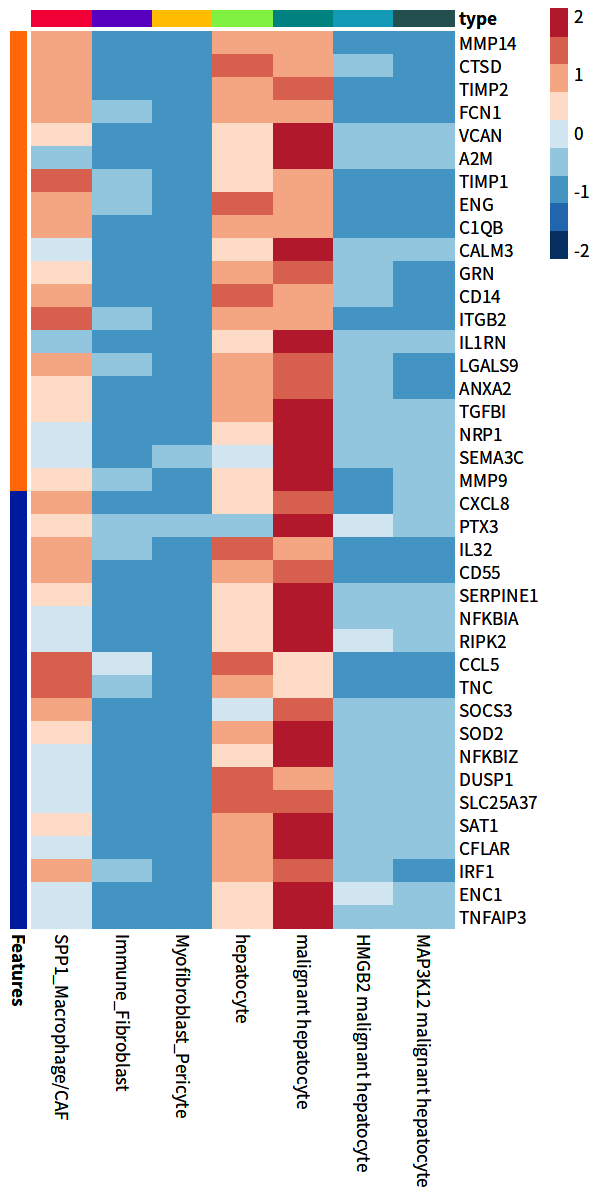

In [103]:
options(repr.plot.width=5, repr.plot.height=10)
pq <- pheatmap::pheatmap(pseudo_exp2, scale = "row", cluster_cols = F, cluster_rows = F, annotation_col = annotation_col, 
                        annotation_row = annotation_row,
                        color = color_brew, annotation_colors = ann_colors, 
                   border_color = "NA", annotation_legend = F)
pq

# Save